In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
n = 10

In [4]:
target = simulate_s(n, index_prefix='Sample ')
target

Sample 0    0.852227
Sample 1    0.811341
Sample 2    0.190561
Sample 3    0.514688
Sample 4    0.753064
Sample 5    0.537122
Sample 6    0.174823
Sample 7    0.674977
Sample 8    0.371118
Sample 9    0.171562
Name: Simulated Series, dtype: float64

In [5]:
features_continuous = simulate_df(
    n * 2, n, index_prefix='Feature ', column_prefix='Sample ')
features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.234364,0.207082,0.669667,0.991905,0.999797,0.368461,0.641502,0.394398,0.302909,0.088977
Feature 1,0.665808,0.780089,0.014604,0.857165,0.671095,0.265166,0.229360,0.970308,0.631147,0.240906
Feature 2,0.185148,0.607617,0.299255,0.055785,0.671675,0.485855,0.551158,0.023606,0.682664,0.864325
Feature 3,0.763763,0.659890,0.964455,0.385063,0.357660,0.888931,0.556003,0.464733,0.397589,0.456671
Feature 4,0.482858,0.475621,0.859783,0.794128,0.337647,0.215072,0.210379,0.238867,0.695965,0.323268
Feature 5,0.111998,0.042417,0.340242,0.603016,0.323873,0.823269,0.312400,0.169905,0.383704,0.668507
Feature 6,0.441651,0.374201,0.413970,0.471914,0.403263,0.763948,0.203848,0.129755,0.403257,0.470104
Feature 7,0.397683,0.943181,0.120279,0.501950,0.125306,0.190209,0.538337,0.772166,0.856828,0.131500
Feature 8,0.311232,0.690174,0.271290,0.917616,0.224572,0.360635,0.292362,0.390673,0.878797,0.734502
Feature 9,0.483820,0.858643,0.486676,0.661731,0.044196,0.114593,0.259616,0.689024,0.588128,0.524128


Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Target Simulated Series (10,) and features (20, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


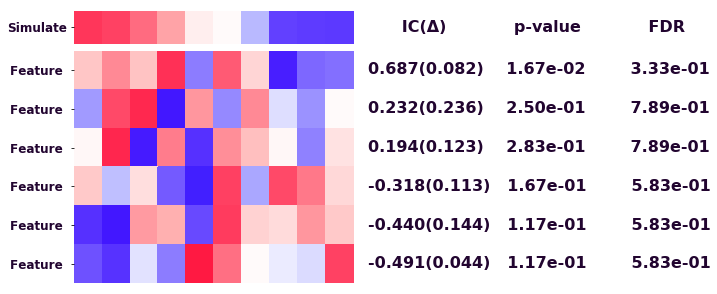

In [7]:
match_scores_for_continuous = make_match_panel(
    target, features_continuous, n_features=3, n_samplings=3, n_permutations=3)

In [8]:
features_categorical = simulate_df(
    n * 8, n, 8, index_prefix='Feature ', column_prefix='Sample ')
features_categorical

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,4,1,1,5,1,0,2,0,6
Feature 1,2,3,4,3,7,4,3,2,7,2
Feature 2,0,0,2,0,0,0,1,7,3,4
Feature 3,7,2,6,0,2,1,1,3,4,7
Feature 4,2,1,0,4,4,1,7,5,4,6
Feature 5,6,6,7,6,2,1,2,3,1,2
Feature 6,4,4,2,3,0,1,7,7,3,7
Feature 7,6,5,0,3,1,6,7,4,2,6
Feature 8,3,2,5,0,4,0,4,3,3,7
Feature 9,0,3,3,7,1,5,6,4,7,4


Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


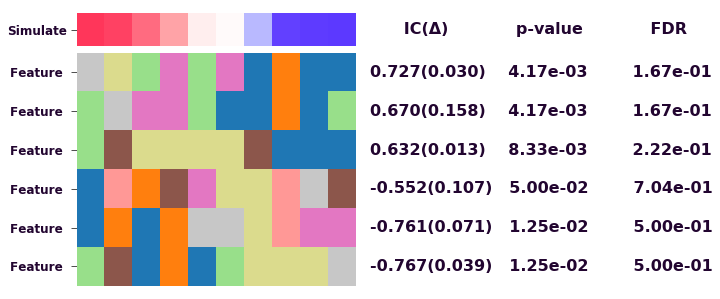

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical')

In [10]:
features_binary = simulate_df(
    n * 8, n, 2, index_prefix='Feature ', column_prefix='Sample ')
features_binary

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,0,1,1,1,1,0,0,0,0
Feature 1,0,1,0,1,1,0,1,0,1,0
Feature 2,0,0,0,0,0,0,1,1,1,0
Feature 3,1,0,0,0,0,1,1,1,0,1
Feature 4,0,1,0,0,0,1,1,1,0,0
Feature 5,0,0,1,0,0,1,0,1,1,0
Feature 6,0,0,0,1,0,1,1,1,1,1
Feature 7,0,1,0,1,1,0,1,0,0,0
Feature 8,1,0,1,0,0,0,0,1,1,1
Feature 9,0,1,1,1,1,1,0,0,1,0


Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


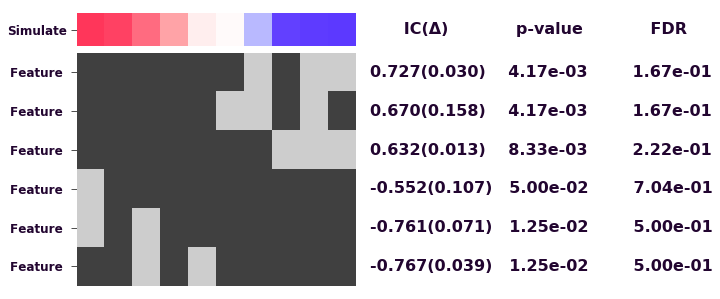

In [13]:
match_scores_for_binary = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary')

In [14]:
# Features format:
# [
#     Feature name (str):,
#     Features (DataFrame): (n_features, n_samples),
#     Emphasis (str): 'High' | 'Low',
#     Feature type (str): 'continuous' | 'categorical' | 'binary',
#     Match (str | DataFrame): Saved file path or returned DataFrame from
#         make_match_panel
#     Index (iterable): Features to plot,
#     Index alias (iterable): Name shown for the features to plot,
# ]

features = [
    [
        'Continuous features name',
        features_continuous,
        'High',
        'continuous',
        match_scores_for_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Categorical features name',
        features_categorical,
        'High',
        'categorical',
        match_scores_for_categorical,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Binary features name',
        features_binary,
        'High',
        'binary',
        match_scores_for_binary,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Continuous features name',
        features_continuous.iloc[:, :-1],
        'High',
        'continuous',
        match_scores_for_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
]

Indexs: ()
Target Simulated Series (10,) and features (20, 10) have 10 shared columns.
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Making annotations ...
Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Making annotations ...
Target Simulated Series (10,) and features (20, 9) have 9 shared columns.
Making annotations ...


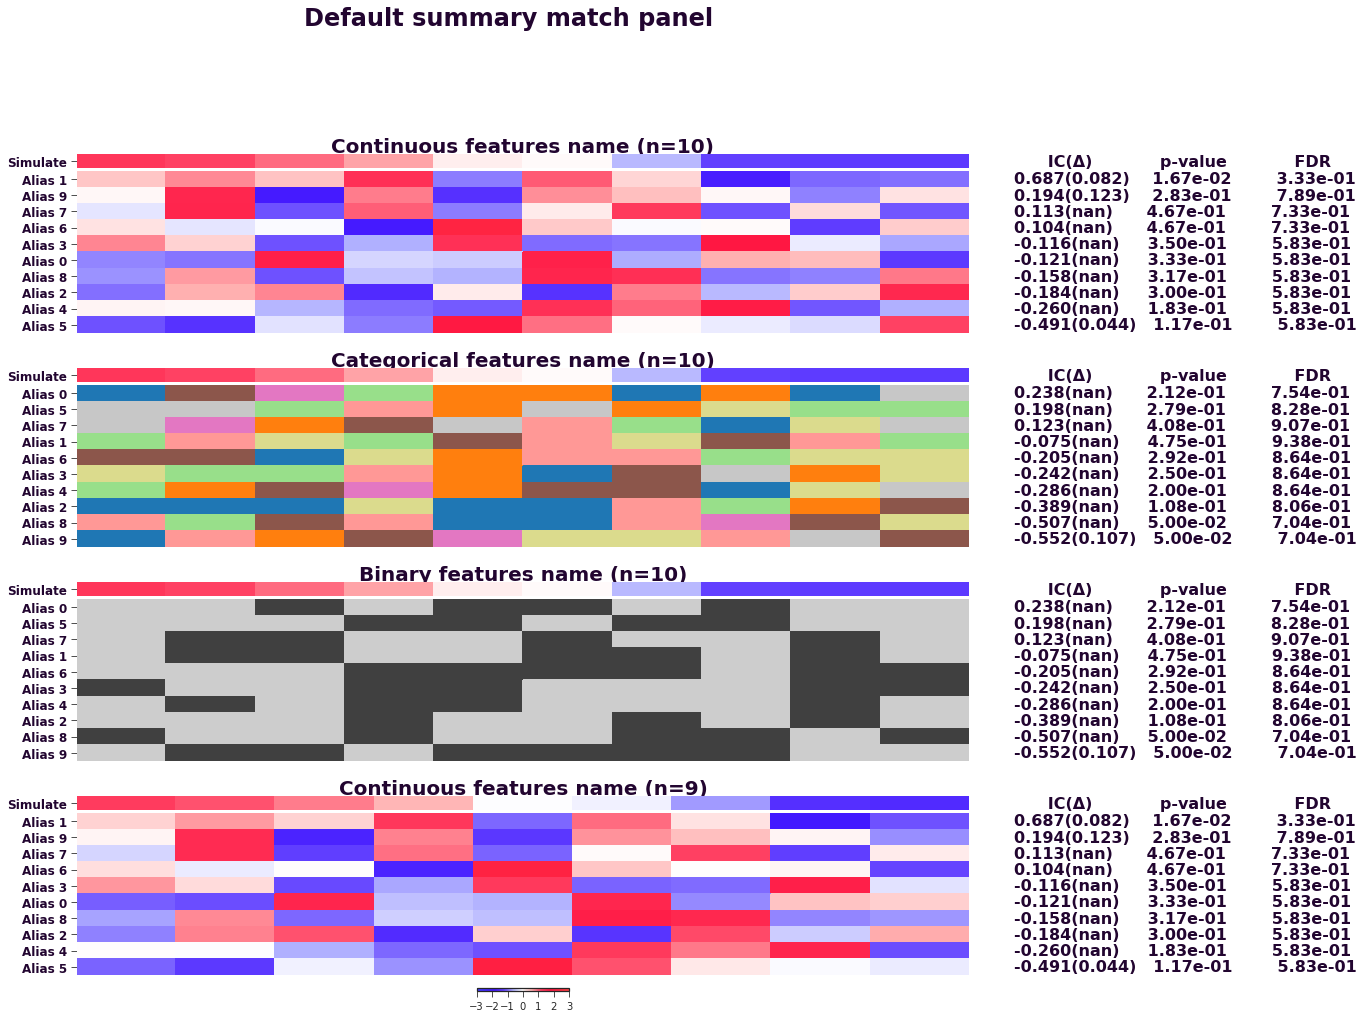

In [20]:
make_summary_match_panel(
    target, features, indexs=(), title='Default summary match panel')

Indexs: ['Sample 1', 'Sample 2', 'Sample 3']
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Dropping 20 axis-1 slices containing at most 1 unique object(s) ...
Making annotations ...
Making annotations ...


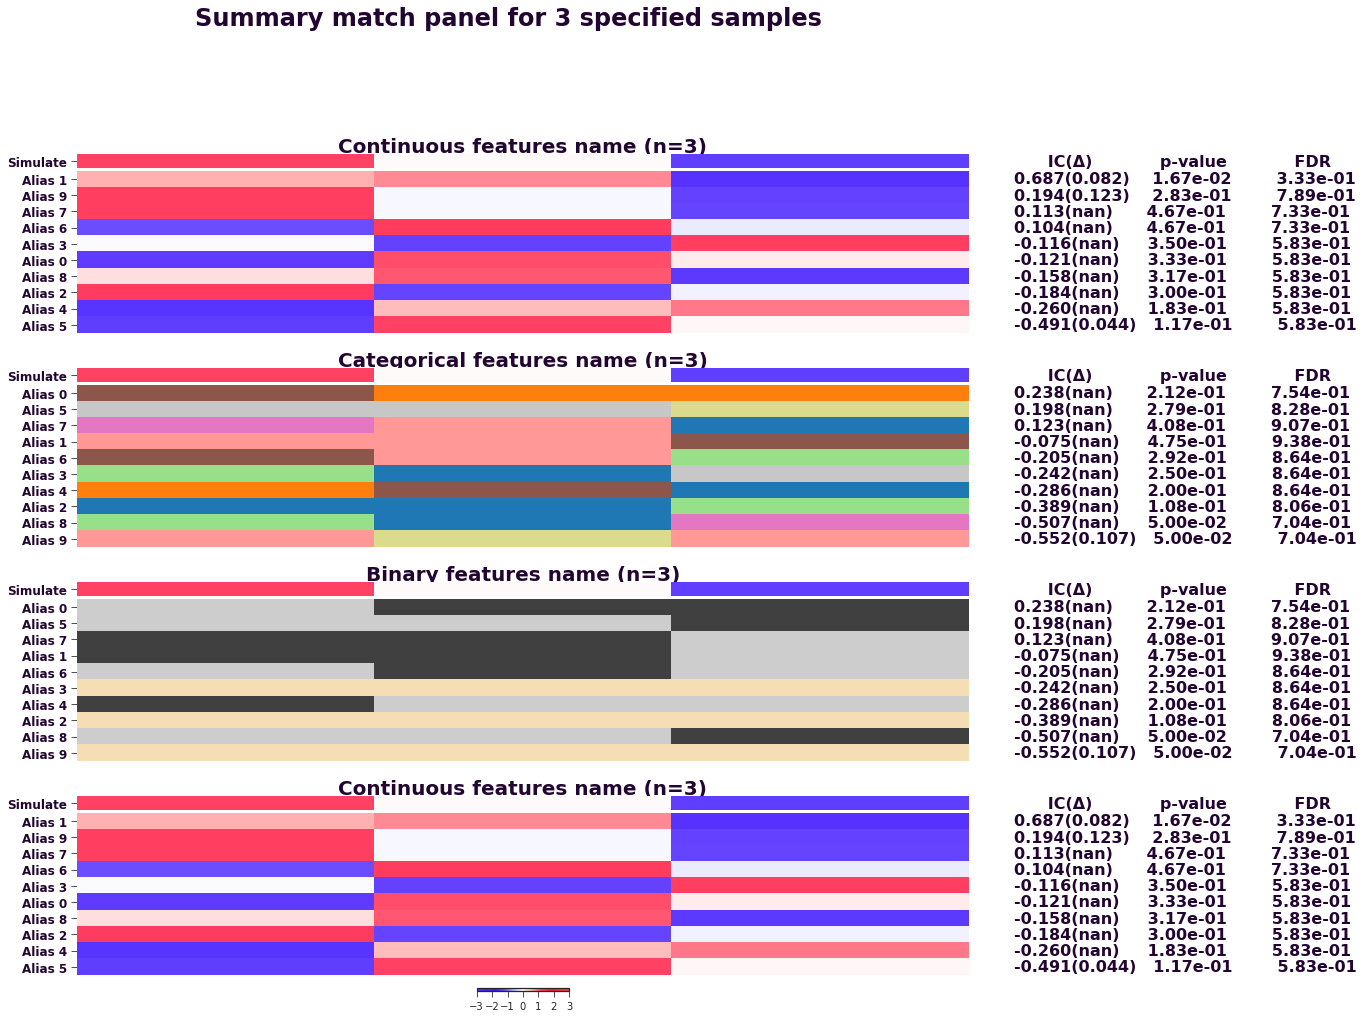

In [23]:
make_summary_match_panel(
    target,
    features,
    indexs=['Sample 1', 'Sample 2', 'Sample 3'],
    title='Summary match panel for 3 specified samples')

Indexs: Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Index(['Sample 0', 'Sample 1', 'Sample 4', 'Sample 7', 'Sample 5', 'Sample 3',
       'Sample 8', 'Sample 2', 'Sample 6'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Making annotations ...
Index(['Sample 0', 'Sample 1', 'Sample 4', 'Sample 7', 'Sample 5', 'Sample 3',
       'Sample 8', 'Sample 2', 'Sample 6'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8', 'Sample 9'],
      dtype='object')
Making annotations ...
Index(['Sample 0', 'Sample 1', 'Sample 4', 'Sample 7', 'Sample 5', 'Sample 3',
       'Sample 8', 'Sample 2', 'Sample 6'],
      dtype='object')
Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8'],
      dtype='object')
Making annotations ...


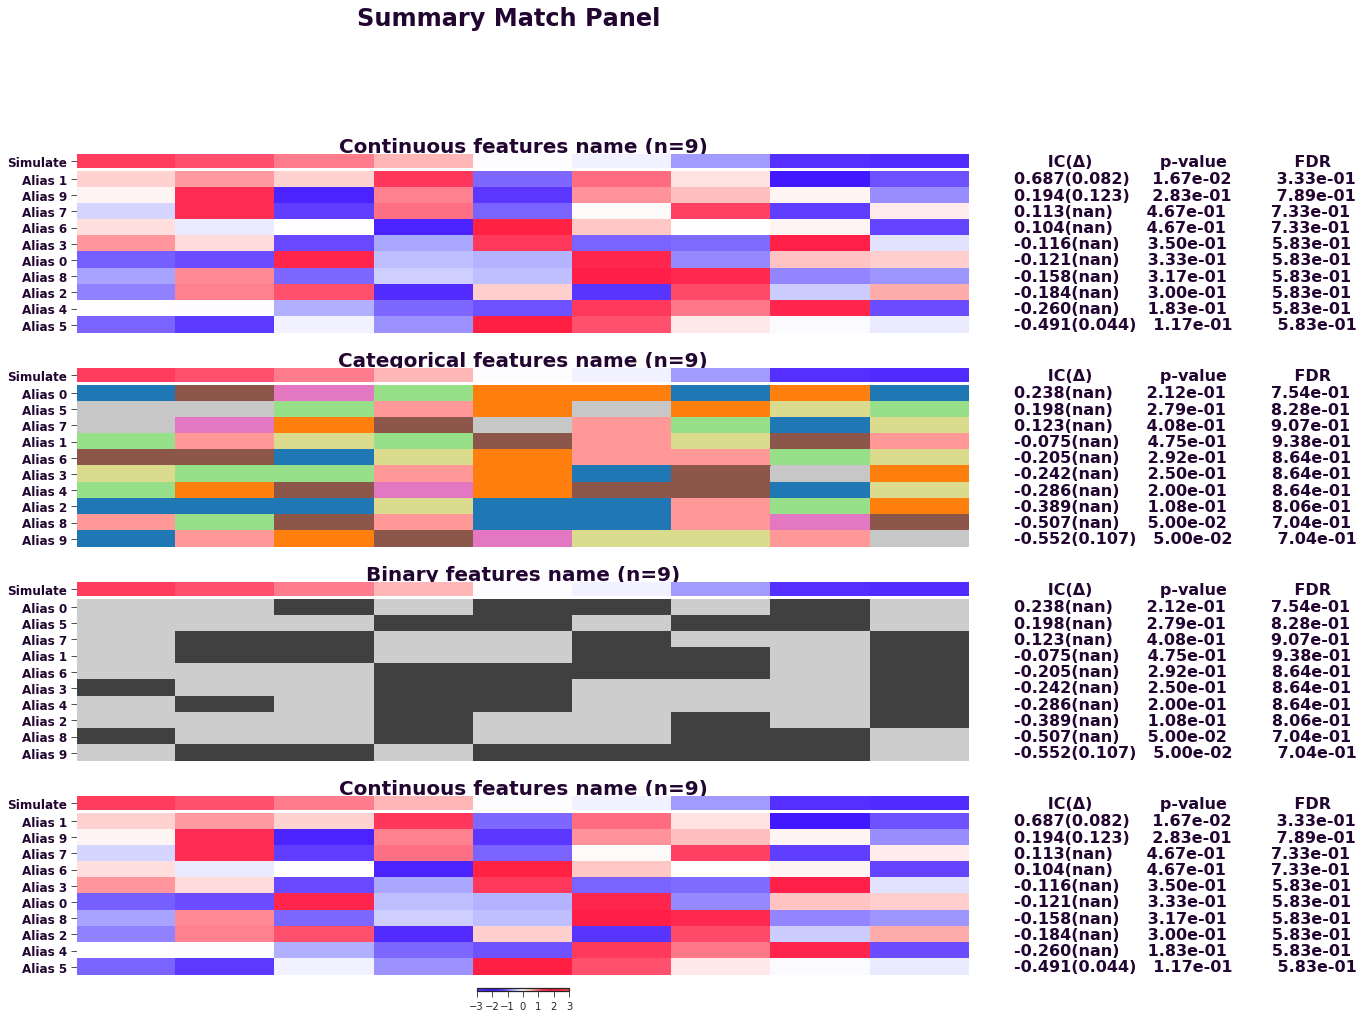

In [17]:
make_summary_match_panel(target, features, indexs='only_shared')

Indexs: Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8'],
      dtype='object')
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Making annotations ...
Making annotations ...


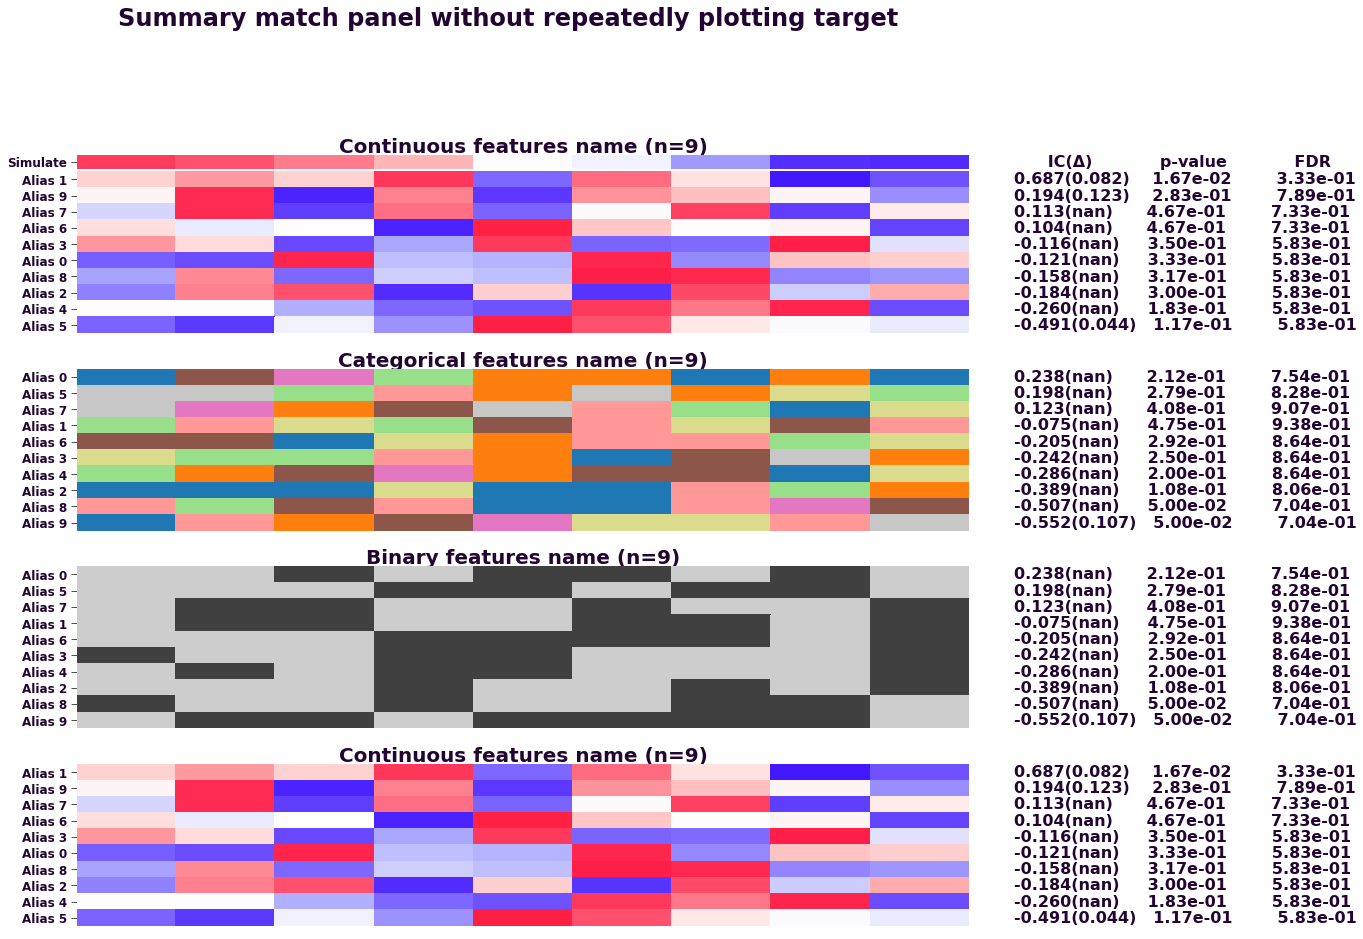

In [24]:
make_summary_match_panel(
    target,
    features,
    indexs='only_shared',
    repeat_plotting_target=False,
    title='Summary match panel without repeatedly plotting target')

Indexs: Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8'],
      dtype='object')
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Making annotations ...
Making annotations ...


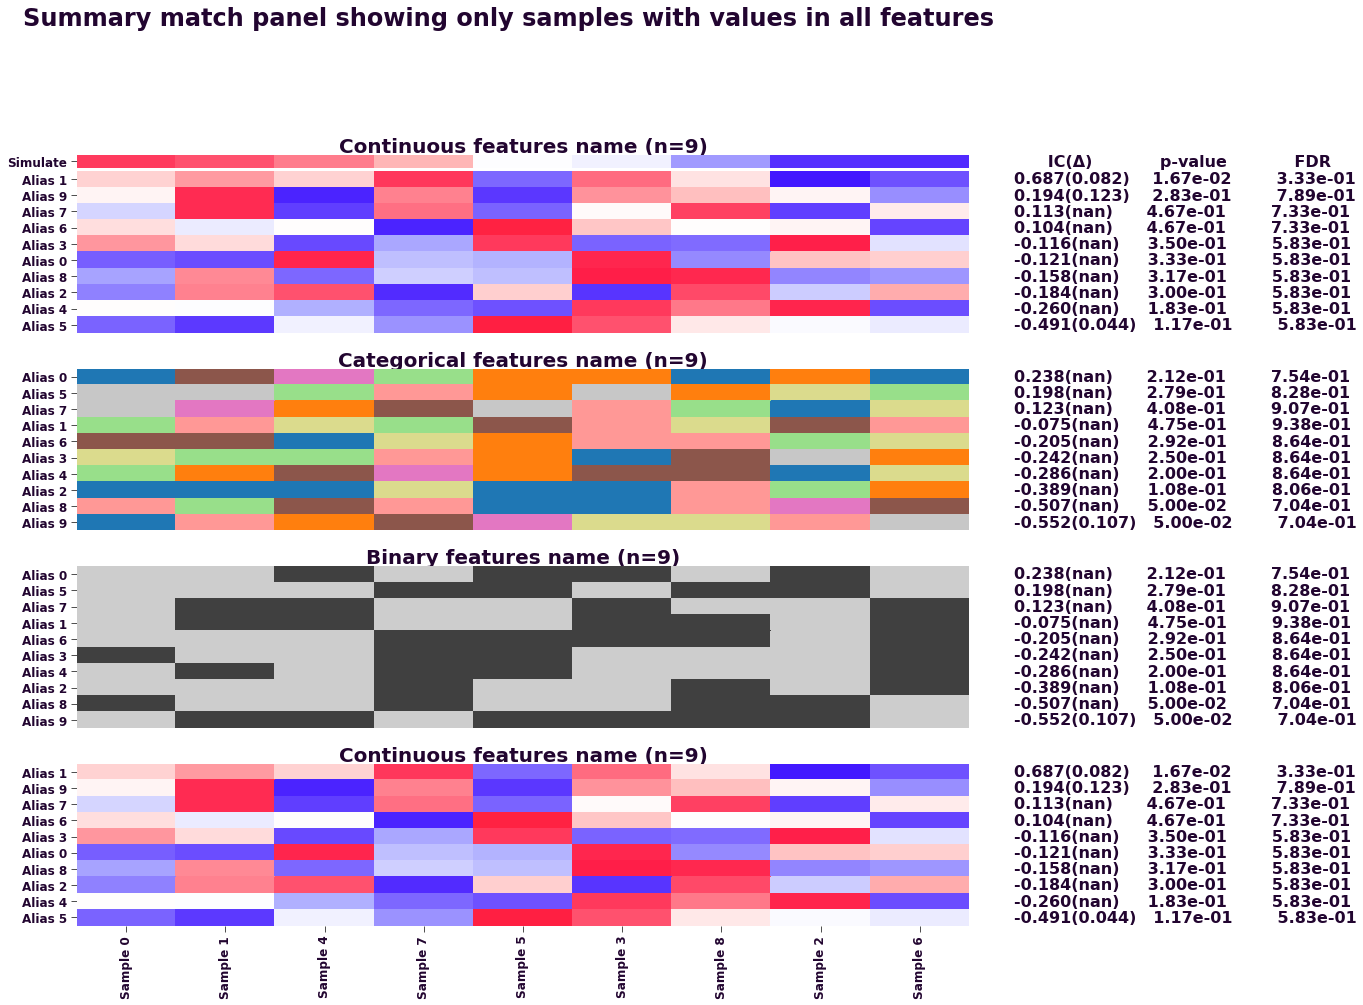

In [25]:
make_summary_match_panel(
    target,
    features,
    indexs='only_shared',
    repeat_plotting_target=False,
    plot_sample_names=True,
    title='Summary match panel showing only samples with values in all features'
)